In [1]:
# Importing necessary libraries for data analysis and visualization  
# numpy for numerical operations  
# pandas for handling datasets  
# matplotlib.pyplot for plotting graphs  
# seaborn for enhanced data visualization  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset from a CSV file  
# Displaying the first 5 rows of the dataset  
df = pd.read_csv(r"D:\1 DS PROJECTS\DS House prediction\data.csv")
df.head(5)

In [ ]:
# Checking the dimensions of the dataset (rows, columns)
df.shape

In [ ]:
# Displaying summary information about the dataset (data types, non-null values)
df.info()

In [ ]:
# Checking for missing values in each column of the dataset
df.isnull().sum()

In [ ]:
# Getting the number of unique values in each column of the dataset
df.nunique()

In [ ]:
# Generating descriptive statistics for numerical columns (mean, std, min, max, etc.)
df.describe()

In [8]:
# Compute correlation matrix using only numeric columns
df = df.apply(pd.to_numeric, errors='coerce')
df_correlation = df.corr()

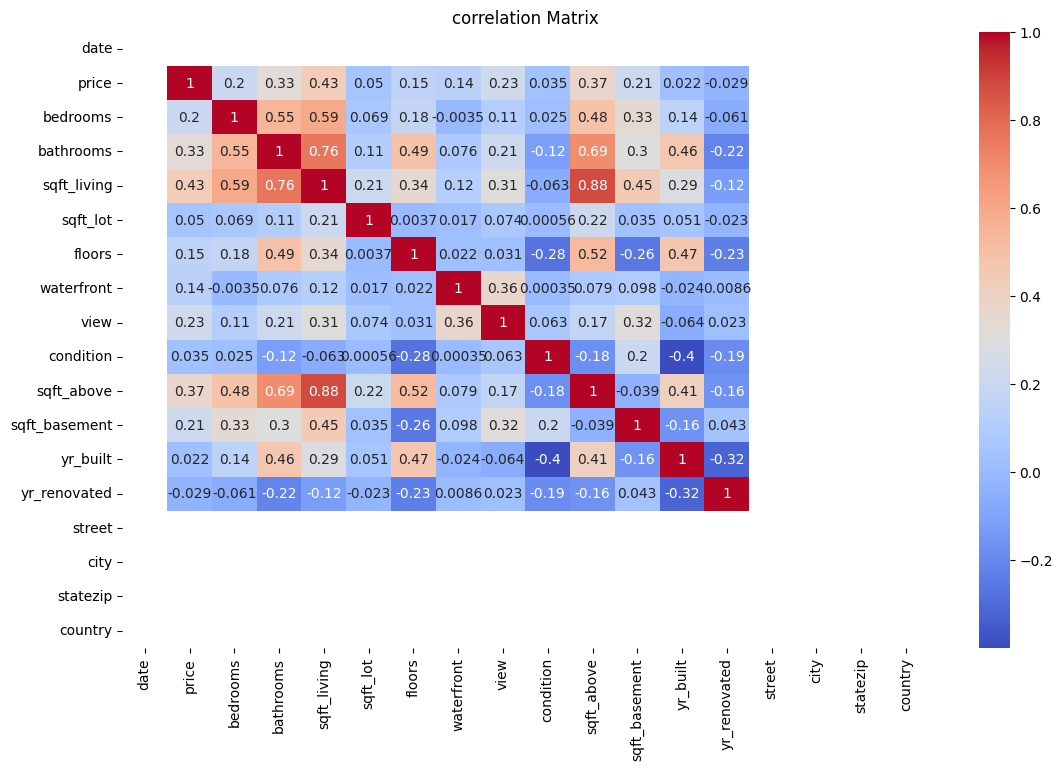

In [ ]:
# Calculating the correlation matrix for the dataset  
# Plotting a heatmap to visualize correlations between numerical features  
# Using 'coolwarm' color map and annotating values in the heatmap
df_correlation = df.corr()
plt.figure(figsize=(13,8))
sns.heatmap(df_correlation,annot=True,cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()

In [ ]:
# Displaying the column names of the dataset
df.columns

In [ ]:
# Dropping unnecessary columns from the dataset: 'date', 'yr_renovated', 'street', 'city', 'statezip', 'country'
removing_columns =['date','yr_renovated','street', 'city','statezip','country']
df = df.drop(columns= removing_columns)

In [ ]:
# Displaying the first 5 rows of the updated dataset after removing specific columns
df.head()

In [ ]:
# Calculating Z-scores to detect outliers in the dataset  
# Setting a threshold of 3 to identify outliers  
# Removing rows with outliers based on the Z-score threshold  
# Printing the dataset size before and after removing outliers
import scipy.stats as stats
z_scores = stats.zscore(df)
threshold = 3
print("size before removing outliers:", df.shape)
outliers_df = df[(z_scores>threshold).any(axis=1)]
df = df[(z_scores <= threshold).all(axis=1)]
print("size after removing outliers:", df.shape)

In [ ]:
# Displaying the first 5 rows of the dataset containing only the outliers
outliers_df.head()

In [20]:
# Scaling the features using StandardScaler to standardize the dataset  
# Transforming the dataset and creating a new DataFrame with scaled values
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(df)

df_scale = pd.DataFrame(scalar.transform(df), columns=df.columns)

In [21]:
# Importing necessary libraries for model training and evaluation  
# train_test_split for splitting data into training and testing sets  
# KNeighborsRegressor for K-Nearest Neighbors regression model  
# LinearRegression for Linear Regression model  
# DecisionTreeRegressor for Decision Tree regression model  
# RandomForestRegressor for Random Forest regression model  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Splitting the dataset into features (X) and target variable (y)  
# 'price' is the target variable, and the rest are features  
# Dividing the data into training and testing sets with a 75-25% split  
# Using random_state=42 for reproducibility
x = df.drop("price",axis=1)
y = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)

In [23]:
# Printing the shapes of the training and testing feature sets (x_train, x_test)
print(f"xtrain {x_train.shape}")
print(f"xtest {x_test.shape}")

xtrain (3183, 11)
xtest (1061, 11)


In [ ]:
# Defining a list of models for evaluation  
# RandomForestRegressor, LinearRegression, DecisionTreeRegressor, and KNeighborsRegressor
models = [

    ('Random Forest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('KNN', KNeighborsRegressor())
     
]

In [26]:
# Importing evaluation metrics to assess model performance  
# mean_squared_error for calculating the MSE  
# r2_score for calculating the R-squared value  
# mean_absolute_error for calculating the MAE
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [27]:
# Training and evaluating each model in the models list  
# Fitting the model on the training data and predicting on the test data  
# Printing the mean squared error (MSE) for each model
for name,model in models:
    print(name)
    print()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("mean_squared_error:",mean_squared_error(y_test,y_pred))
    print('\n')

Random Forest

mean_squared_error: 43877041548.99139


Linear Regression

mean_squared_error: 41194072741.057686


Decision Tree

mean_squared_error: 73112760304.05667


KNN

mean_squared_error: 54270710864.73361


